In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
train=pd.read_csv(r"C:\Users\HP\Downloads\reviews.csv.zip")
train.head()


,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [3]:
train.isnull().sum()

Time_submitted        0
Review                0
Rating                0
Total_thumbsup        0
Reply             61378
dtype: int64

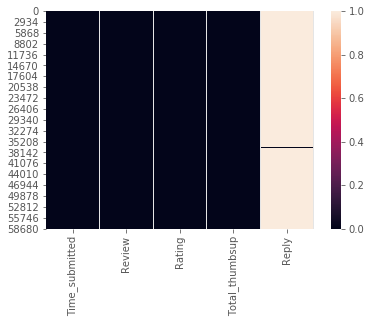

In [4]:
sns.heatmap(train.isnull())

In [5]:
train.drop(["Time_submitted","Total_thumbsup","Reply"],axis=1,inplace=True)

In [6]:
train.head()

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1


In [7]:
print(train.shape)

(61594, 2)


In [8]:
df=train.head(500)

In [9]:
print(df.shape)

(500, 2)


In [10]:
df["Rating"].value_counts()

5    172
1    157
4     73
3     53
2     45
Name: Rating, dtype: int64

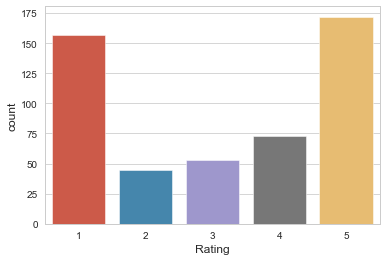

In [11]:
sns.set_style("whitegrid") 
sns.countplot(x="Rating",data=df)

In [12]:
example= df["Review"][50]
print(example)

Podcasts becoming a nightmare. Trying to get rid of podcasts on this app is ridiculous. Stupid things are all over the home page. You can click not interested till you're blue in the face and I'll just keep throwing up more spam casts.


In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm



In [14]:
sia = SentimentIntensityAnalyzer()

In [80]:
sia.polarity_scores(example)

{'neg': 0.224, 'neu': 0.776, 'pos': 0.0, 'compound': -0.8736}

In [17]:
res={}
for i, row in tqdm(df.iterrows(), total=len(df)):
    Review=row["Review"]
    myid= row[0]
    res[myid]= sia.polarity_scores(Review)

In [18]:
res

{'Great music service, the audio is high quality and the app is easy to use. Also very quick and friendly support.': {'neg': 0.0,
  'neu': 0.564,
  'pos': 0.436,
  'compound': 0.9211},
 'Please ignore previous negative rating. This app is super great. I give it five stars+': {'neg': 0.243,
  'neu': 0.353,
  'pos': 0.404,
  'compound': 0.6249},
 'This pop-up "Get the best Spotify experience on Android 12" is too annoying. Please let\'s get rid of this.': {'neg': 0.107,
  'neu': 0.635,
  'pos': 0.258,
  'compound': 0.5859},
 'Really buggy and terrible to use as of recently': {'neg': 0.296,
  'neu': 0.704,
  'pos': 0.0,
  'compound': -0.5209},
 "Dear Spotify why do I get songs that I didn't put on my playlist??? And why do we have shuffle play?": {'neg': 0.0,
  'neu': 0.74,
  'pos': 0.26,
  'compound': 0.7149},
 'The player controls sometimes disappear for no reason. App restart forgets what I was playing but fixes the issue.': {'neg': 0.157,
  'neu': 0.771,
  'pos': 0.072,
  'compound': 

In [22]:
pd.DataFrame(res).T

,neg,neu,pos,compound
"Great music service, the audio is high quality and the app is easy to use. Also very quick and friendly support.",0.000,0.564,0.436,0.9211
Please ignore previous negative rating. This app is super great. I give it five stars+,0.243,0.353,0.404,0.6249
"This pop-up ""Get the best Spotify experience on Android 12"" is too annoying. Please let's get rid of this.",0.107,0.635,0.258,0.5859
Really buggy and terrible to use as of recently,0.296,0.704,0.000,-0.5209
Dear Spotify why do I get songs that I didn't put on my playlist??? And why do we have shuffle play?,0.000,0.740,0.260,0.7149
...,...,...,...,...
I used this and it was the best app for music,0.000,0.682,0.318,0.6369
Crashes on android everytime I go full screen. I thought this was a mature app? Where is quality control?,0.000,0.826,0.174,0.4871
"App is terrible. It always errors out, crashes, fails to display a toggle bar for whatever you are listening to in order to pause or skip ahead. How can such a big company have such an awful platform.",0.261,0.739,0.000,-0.8834
It's easy to safe and play my favorite tunes. I have been able to hear and save everything that I requested to listen to.,0.000,0.541,0.459,0.9246


In [48]:
df1=pd.DataFrame(res).T


In [33]:
df1 #here we have sentiment score and metadata.
    ## sentiment score is between -1 to 1 where close to -1 indicates negative, 0 is newtral slose to 1 is positive sentiment.

,index,neg,neu,pos,compound
0,"Great music service, the audio is high quality...",0.000,0.564,0.436,0.9211
1,Please ignore previous negative rating. This a...,0.243,0.353,0.404,0.6249
2,"This pop-up ""Get the best Spotify experience o...",0.107,0.635,0.258,0.5859
3,Really buggy and terrible to use as of recently,0.296,0.704,0.000,-0.5209
4,Dear Spotify why do I get songs that I didn't ...,0.000,0.740,0.260,0.7149
...,...,...,...,...,...
495,I used this and it was the best app for music,0.000,0.682,0.318,0.6369
496,Crashes on android everytime I go full screen....,0.000,0.826,0.174,0.4871
497,"App is terrible. It always errors out, crashes...",0.261,0.739,0.000,-0.8834
498,It's easy to safe and play my favorite tunes. ...,0.000,0.541,0.459,0.9246


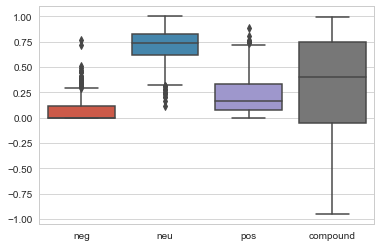

In [49]:
sns.boxplot(data=df1)
plt.show()